# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [46]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Testing the data from the url
#url = "http://api.openweathermap.org/data/2.5/forecast?"

In [4]:
#response = requests.get(url).json()

In [5]:
#from pprint import pprint

In [6]:
# View the output for making values to append to lists
#pprint(response)

{'city': {'coord': {'lat': -22.8253, 'lon': -43.1706},
          'country': 'BR',
          'id': 3451190,
          'name': 'Ribeira',
          'population': 6023699},
 'cnt': 40,
 'cod': '200',
 'list': [{'clouds': {'all': 24},
           'dt': 1553364000,
           'dt_txt': '2019-03-23 18:00:00',
           'main': {'grnd_level': 1001.77,
                    'humidity': 82,
                    'pressure': 1014.29,
                    'sea_level': 1014.29,
                    'temp': 84.18,
                    'temp_kf': 1.54,
                    'temp_max': 84.18,
                    'temp_min': 81.4},
           'sys': {'pod': 'd'},
           'weather': [{'description': 'few clouds',
                        'icon': '02d',
                        'id': 801,
                        'main': 'Clouds'}],
           'wind': {'deg': 110.5, 'speed': 4.29}},
          {'clouds': {'all': 68},
           'dt': 1553374800,
           'dt_txt': '2019-03-23 21:00:00',
           'main': {'gr

           'main': {'grnd_level': 1007.79,
                    'humidity': 100,
                    'pressure': 1020.38,
                    'sea_level': 1020.38,
                    'temp': 70.35,
                    'temp_kf': 0,
                    'temp_max': 70.35,
                    'temp_min': 70.35},
           'rain': {'3h': 4.6},
           'sys': {'pod': 'n'},
           'weather': [{'description': 'moderate rain',
                        'icon': '10n',
                        'id': 501,
                        'main': 'Rain'}],
           'wind': {'deg': 82.5032, 'speed': 1.9}},
          {'clouds': {'all': 80},
           'dt': 1553742000,
           'dt_txt': '2019-03-28 03:00:00',
           'main': {'grnd_level': 1007.59,
                    'humidity': 100,
                    'pressure': 1020.3,
                    'sea_level': 1020.3,
                    'temp': 70.78,
                    'temp_kf': 0,
                    'temp_max': 70.78,
                    'temp

In [36]:
#response["city"]["name"]

'Palmer'

In [47]:
# Processing the data
url = "http://api.openweathermap.org/data/2.5/forecast?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="



# Lists for holding values for the data
cloudiness = []
humidity = []
lat = []
lon = []
temp = []
wind_speed = []
country = []
date = []
max_temp = []
city_list = []


# Printing out the results of each city being processed from the successive API calls
print("Beginning Data Retrieval")
print("-----------------------------")
      
index = 1      
set_num = 1


for city in cities:  

    try:   
        response = requests.get(query_url + city).json()  
        
        print(f"Processing Record {index} of Set {set_num} | " + city)
        index+=1
        
        cloudiness.append(response["list"][0]["clouds"]["all"])
        humidity.append(response["list"][0]["main"]["humidity"])               
        lat.append(response["city"]["coord"]["lat"])
        lon.append(response["city"]["coord"]["lon"])
        temp.append(response["list"][0]["main"]["temp"])
        wind_speed.append(response["list"][0]["wind"]["speed"])
        country.append(response["city"]["country"])
        date.append(response["list"][0]["dt"])
        max_temp.append(response["list"][0]["main"]["temp_max"])
        city_list.append(response["city"]["name"])
        
        if(index > 50):
            set_num+=1
            index = 0

        
# Print this output if city is not found
    except(KeyError, ValueError):
        print("City not found. Skipping...")

    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | churapcha
Processing Record 2 of Set 1 | itarema
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | comodoro rivadavia
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | samusu
City not found. Skipping...
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | cherdyn
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | netrakona
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | t

Processing Record 30 of Set 4 | gizo
Processing Record 31 of Set 4 | cairns
Processing Record 32 of Set 4 | santa eulalia del rio
City not found. Skipping...
Processing Record 33 of Set 4 | pringsewu
Processing Record 34 of Set 4 | port lincoln
Processing Record 35 of Set 4 | cabo san lucas
Processing Record 36 of Set 4 | colac
Processing Record 37 of Set 4 | hamilton
Processing Record 38 of Set 4 | ulladulla
Processing Record 39 of Set 4 | bamenda
Processing Record 40 of Set 4 | sanchor
Processing Record 41 of Set 4 | bone
Processing Record 42 of Set 4 | pundaguitan
Processing Record 43 of Set 4 | yulara
Processing Record 44 of Set 4 | gao
Processing Record 45 of Set 4 | half moon bay
Processing Record 46 of Set 4 | dumas
Processing Record 47 of Set 4 | kendari
Processing Record 48 of Set 4 | krasyliv
Processing Record 49 of Set 4 | vardo
Processing Record 50 of Set 4 | manbij
Processing Record 0 of Set 5 | oxford
Processing Record 1 of Set 5 | margate
Processing Record 2 of Set 5 | n

Processing Record 14 of Set 8 | huarmey
Processing Record 15 of Set 8 | ostrovnoy
Processing Record 16 of Set 8 | san patricio
Processing Record 17 of Set 8 | port macquarie
Processing Record 18 of Set 8 | iberia
Processing Record 19 of Set 8 | sept-iles
Processing Record 20 of Set 8 | codrington
Processing Record 21 of Set 8 | warrington
Processing Record 22 of Set 8 | lyubinskiy
Processing Record 23 of Set 8 | gerede
Processing Record 24 of Set 8 | visby
Processing Record 25 of Set 8 | jonesboro
Processing Record 26 of Set 8 | naze
Processing Record 27 of Set 8 | ihosy
Processing Record 28 of Set 8 | altamont
Processing Record 29 of Set 8 | zhob
Processing Record 30 of Set 8 | wah
City not found. Skipping...
Processing Record 31 of Set 8 | trinidad
Processing Record 32 of Set 8 | port moresby
Processing Record 33 of Set 8 | sabang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | santa juliana
Processing Record 36 of Set 8 | santa cruz
Processing Record 37 of S

Processing Record 47 of Set 11 | san rafael
Processing Record 48 of Set 11 | tual
Processing Record 49 of Set 11 | haines junction
Processing Record 50 of Set 11 | sebinkarahisar
Processing Record 0 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 1 of Set 12 | rio gallegos
Processing Record 2 of Set 12 | sao joao da barra
Processing Record 3 of Set 12 | quang ngai
Processing Record 4 of Set 12 | kisaran
Processing Record 5 of Set 12 | cayenne
Processing Record 6 of Set 12 | kargil
Processing Record 7 of Set 12 | miguel auza
Processing Record 8 of Set 12 | victor harbor
Processing Record 9 of Set 12 | katobu
Processing Record 10 of Set 12 | tucuman
Processing Record 11 of Set 12 | mana
Processing Record 12 of Set 12 | edson
Processing Record 13 of Set 12 | gevrai
Processing Record 14 of Set 12 | shenjiamen
Processing Record 15 of Set 12 | boa vista
Processing Record 16 of Set 12 | togur
Processing Record 17 of Set 12 | hastings
Processing Record 18 of Set 12 | longla

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
# Make the dataframe
city_data = pd.DataFrame({"City": city_list,
                      "Cloudiness": cloudiness, 
                      "Country": country, 
                      "Date": date, 
                      "Humidity": humidity,
                      "Lat": lat, 
                  "Lng": lon, 
                   "Max Temp": max_temp, 
                   "Wind Speed": wind_speed})


# Save city data to a csv file
city_data.to_csv("output_data/cities.csv", encoding="utf-8", index=False)


# Display the dataframe
total = city_data.count()
total

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64

In [49]:
# Display the head of dataframe columns for the data
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Churapcha,48,RU,1553364000,62,62.0025,132.4325,-0.15,5.75
1,Itarema,92,BR,1553364000,97,-2.9248,-39.9167,80.49,5.08
2,Comodoro Rivadavia,92,AR,1553364000,100,-45.8654,-67.4808,55.39,25.32
3,Pevek,0,RU,1553364000,35,69.7028,170.2747,-23.64,3.40
4,Ushuaia,20,AR,1553364000,69,-54.8070,-68.3074,55.20,4.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

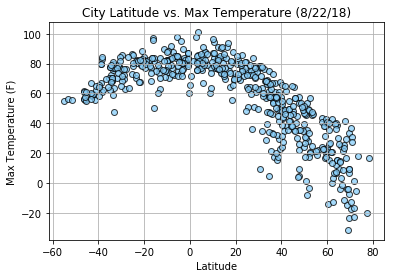

In [50]:
# Make the x and y coordinates
x1 = city_data["Lat"]
y1 = city_data["Max Temp"]


# Make the scatter plot data
plt.scatter(x1, y1, marker="o", facecolors="lightskyblue", edgecolor="black", alpha=0.75)


# Make titles for the graph, x-axis, and y-axis along with adding the grid
plt.title("City Latitude vs. Max Temperature (8/22/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save plotted figure as png file
plt.savefig("images/latitude_temp.png")


# Display the graph
plt.show()

#### Latitude vs. Humidity Plot

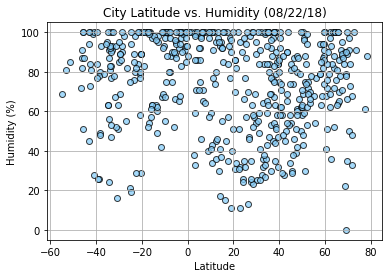

In [51]:
# Make the x and y coordinates
x2 = city_data["Lat"]
y2 = city_data["Humidity"]


# Make the scatter plot data
plt.scatter(x2, y2, marker="o", facecolors="lightskyblue", edgecolor="black", alpha=0.75)


# Make titles for the graph, x-axis, and y-axis along with adding the grid
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save plotted figure as png file
plt.savefig("images/latitude_humidity.png")


# Display the graph
plt.show()

#### Latitude vs. Cloudiness Plot

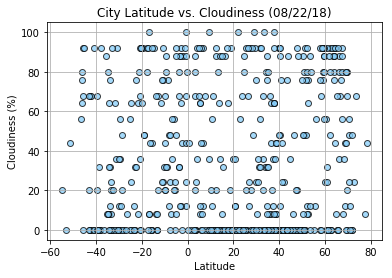

In [52]:
# Make the x and y coordinates
x3 = city_data["Lat"]
y3 = city_data["Cloudiness"]


# Make the scatter plot data
plt.scatter(x3, y3, marker="o", facecolors="lightskyblue", edgecolor="black", alpha=0.75)


# Make titles for the graph, x-axis, and y-axis along with adding the grid
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save plotted figure as png file
plt.savefig("images/latitude_cloudiness.png")


# Display the graph
plt.show()

#### Latitude vs. Wind Speed Plot

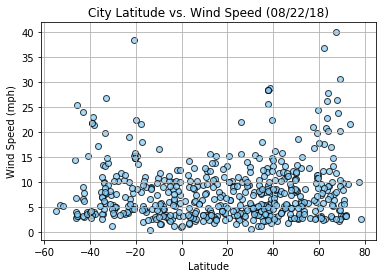

In [53]:
# Make the x and y coordinates
x4 = city_data["Lat"]
y4 = city_data["Wind Speed"]


# Make the scatter plot data
plt.scatter(x4, y4, marker="o", facecolors="lightskyblue", edgecolor="black", alpha=0.75)


# Make titles for the graph, x-axis, and y-axis along with adding the grid
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save plotted figure as png file
plt.savefig("images/latitude_windspeed.png")


# Display the graph
plt.show()

In [ ]:
# Three observable trends based on the data:
# (1) From the data, I noticed that the city latitude seems to have an opposite relationship with humidity compared
#     to wind speed. The city latitude values mostly have high percents of humidity while they mostly have low wind
#     speeds in mph.
# (2) The max temperature values peak between the city latitudes of 0 and 20 before going on a downward trend.
# (3) The city latitude doesn't seem to have a consistent trend with cloudiness with the data being spread out.
